# 3nm Nanosheet Figure of Merit Prediction

Created on Jan 4, 2021

@author: Haoqing Xu @ICAC, IMECAS

This project focus on 3nm nanosheet FoM prediction with Multiple Layer Perceptron

In [2]:
import time
start = time.clock()

# Import packages

In [3]:
import torch
import math
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data Loading

In [4]:
data = np.loadtxt("data_full.csv",dtype="float",delimiter=',', skiprows=1, usecols=None, unpack=False)
print('Data shape:', data.shape)
print(data[:,:])

Data shape: (2074, 9)
[[  1.00000000e-08   4.00000000e-09   0.00000000e+00 ...,   7.63000000e-02
    5.45000000e-05   3.07000000e-09]
 [  1.00000000e-08   4.00000000e-09   0.00000000e+00 ...,   7.16000000e-02
    5.34000000e-05   6.53000000e-10]
 [  1.00000000e-08   4.00000000e-09   0.00000000e+00 ...,   6.76000000e-02
    5.12000000e-05   2.35000000e-10]
 ..., 
 [  2.50000000e-08   8.00000000e-09   2.00000000e-09 ...,   8.41000000e-02
    7.69000000e-05   4.66000000e-08]
 [  2.50000000e-08   8.00000000e-09   2.00000000e-09 ...,   8.88000000e-02
    7.79000000e-05   9.99000000e-08]
 [  2.50000000e-08   8.00000000e-09   2.00000000e-09 ...,   8.37000000e-02
    7.58000000e-05   4.47000000e-08]]


In [23]:
pd_data = pd.read_csv('data_full.csv')
pd_data.corr()

,SheetWidth [m],SheetHeight [m],SheetRadius [m],SpacerLength [m],GateLength [m],Vth [V/dec],SS [V],Ion [A],Ioff [A]
SheetWidth [m],1.000000,-0.101830,-0.007968,0.012986,0.034476,-0.302721,0.017986,0.901048,0.158695
SheetHeight [m],-0.101830,1.000000,0.018927,0.013650,0.150631,-0.555490,0.424900,-0.023617,0.320393
SheetRadius [m],-0.007968,0.018927,1.000000,0.007029,-0.003116,0.009826,-0.008320,-0.010928,-0.017639
SpacerLength [m],0.012986,0.013650,0.007029,1.000000,0.002311,0.029799,-0.050903,-0.108850,-0.009332
GateLength [m],0.034476,0.150631,-0.003116,0.002311,1.000000,0.510224,-0.533167,-0.214876,-0.311970
Vth [V/dec],-0.302721,-0.555490,0.009826,0.029799,0.510224,1.000000,-0.821268,-0.424094,-0.759803
SS [V],0.017986,0.424900,-0.008320,-0.050903,-0.533167,-0.821268,1.000000,0.084449,0.502427
Ion [A],0.901048,-0.023617,-0.010928,-0.108850,-0.214876,-0.424094,0.084449,1.000000,0.208344
Ioff [A],0.158695,0.320393,-0.017639,-0.009332,-0.311970,-0.759803,0.502427,0.208344,1.000000


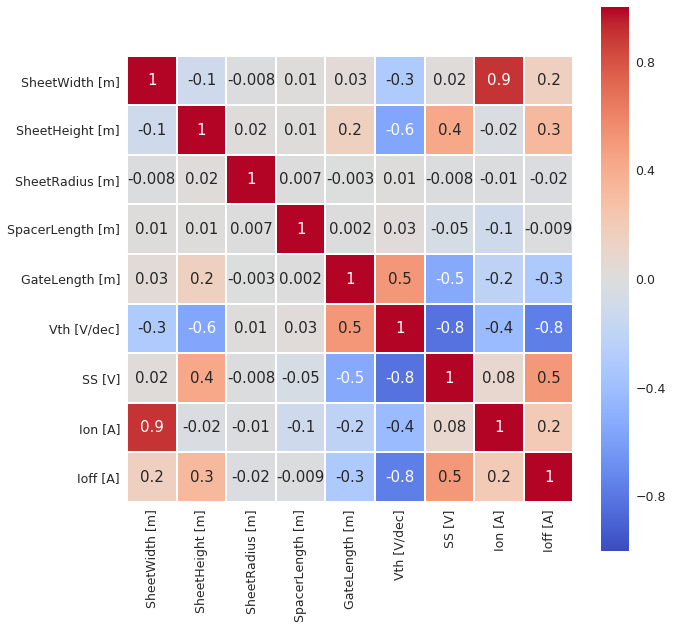

In [25]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(pd_data.corr(), annot=True, vmin=-1, vmax=1, linewidths=1, cmap="coolwarm",square= True, fmt='.1g')
#sns.set(rc={'figure.figsize':(10,10)})

plt.show()